In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from predictor import Predictor
from reshaper import Reshaper
from reshaper import save_obj
from loader import Loader
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
semantic = {
    "Weight": 0, # peso
    "Height": 1, # altura
    'INSEAM_L': 2,
    'ELBOW_GTH_L': 3,
    'HEAD_CIRC': 4,
    'WAIST_GTH': 5,
    "WAIST_T_BUTTOCK": 6,
    'KNEE_HT': 7,
    'NECK_AC_BACK_WTH_AL': 8,
    'ARM_LTH_L': 9,
    'THIGH_GTH_L_HZ': 10,
    'CR_SHOULDER_O_NECK': 11,
    'NECK_AT_BASE_GTH': 12,
    'DIST_NECK_T_HIP': 13,
    "Age": 14
}

MEASURE_NUM = 15

# Select life colums

In [3]:
life_data = pd.read_csv("base_data/life_body_measure.csv", delimiter=",", decimal=",")
life_data.dropna(inplace=True)

In [4]:
life_data = life_data[semantic.keys()]
life_data.reset_index(drop=True, inplace=True)

# Predict age

In [5]:
life_data_without_age = life_data.drop("Age", axis=1).to_numpy()
with np.load("./processed_data/measure.npz", allow_pickle=True) as data:
    measure, _, _, _ = data.values()
    measure /= 10
    measure[0] = ((measure[0]/100)**3)

In [6]:
distance = cdist(measure.T, life_data_without_age)
minid = np.argmin(distance, axis=1)
ages = life_data.loc[minid]["Age"].to_numpy()
measure_with_age = np.column_stack((measure.T, ages))

In [7]:
np.save("processed_data/measures_with_age.npy", measure_with_age)

# Correlation analysis

# Raw data analysis

In [8]:
data = np.full(MEASURE_NUM, np.nan)
data[0] = 65
data[1] = 165
data[-1] = 19
pred = Predictor(data)

In [9]:
over_time = []
for i in np.arange(19,81):
    data = pred.predict_next(denormalize=True)
    over_time.append(data)

In [10]:
data = pd.read_csv("base_data/life_body_measure.csv", delimiter=",", decimal=",")
data = data[semantic.keys()]
data = pd.DataFrame(data.to_numpy())

In [11]:
over_time_better = []
over_time_errors = []

for element in over_time:
    temp_data = data.copy()
    age = element[-1]
    age_column = temp_data.columns[-1]
    temp_data = temp_data[temp_data[age_column] == age]
    
    if temp_data.empty:
        over_time_errors.append(np.nan)
        over_time_better.append(np.full(len(semantic),np.nan))
    else:
        temp = (temp_data - element)
        error = np.sqrt((temp**2).sum(axis=1))
        error.reset_index(drop=True, inplace=True)
        better = np.argmin(error)
        over_time_errors.append(error.iloc[better])
        over_time_better.append(temp_data.iloc[better])

In [12]:
over_time_plot = np.array(over_time)
over_time_better_plot = np.array(over_time_better)
over_time_errors_plot = np.array(over_time_errors)
age_to_plot = over_time_plot[:,-1]

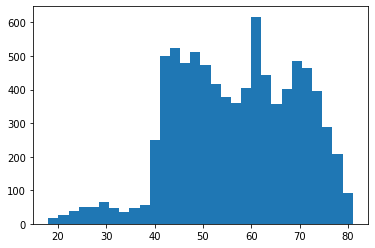

In [13]:
plt.hist(data[14], bins=30)
plt.show()

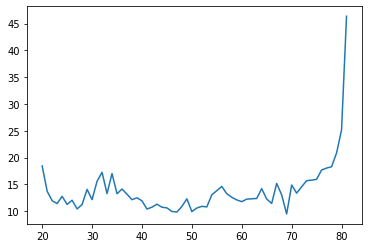

In [14]:
plt.plot(age_to_plot, over_time_errors_plot)

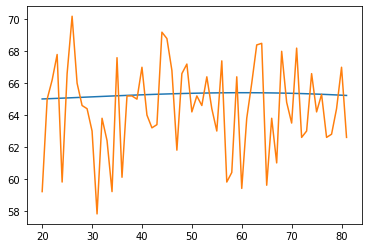

In [15]:
plt.plot(age_to_plot, over_time_plot[:,0])
plt.plot(age_to_plot, over_time_better_plot[:,0])

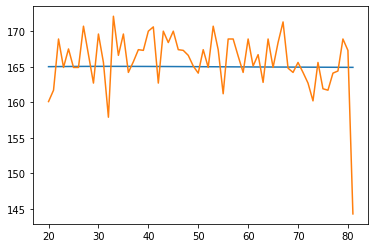

In [16]:
plt.plot(age_to_plot, over_time_plot[:,1])
plt.plot(age_to_plot, over_time_better_plot[:,1])

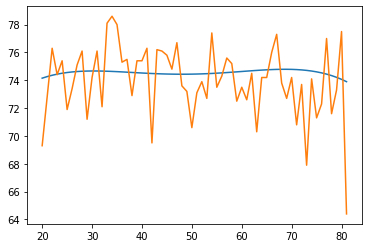

In [17]:
plt.plot(age_to_plot, over_time_plot[:,2])
plt.plot(age_to_plot, over_time_better_plot[:,2])

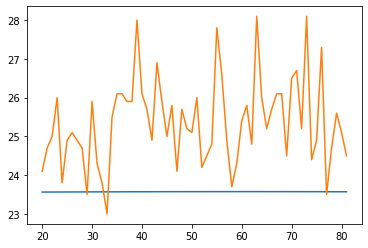

In [18]:
plt.plot(age_to_plot, over_time_plot[:,3])
plt.plot(age_to_plot, over_time_better_plot[:,3])

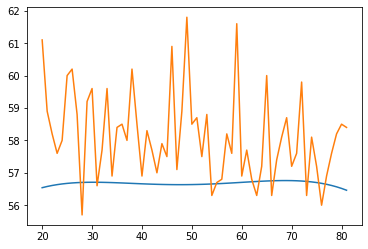

In [19]:
plt.plot(age_to_plot, over_time_plot[:,4])
plt.plot(age_to_plot, over_time_better_plot[:,4])

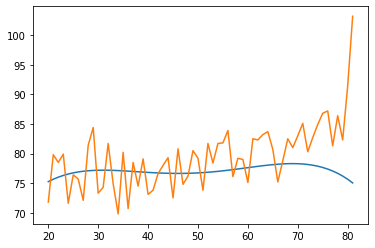

In [20]:
plt.plot(age_to_plot, over_time_plot[:,5])
plt.plot(age_to_plot, over_time_better_plot[:,5])

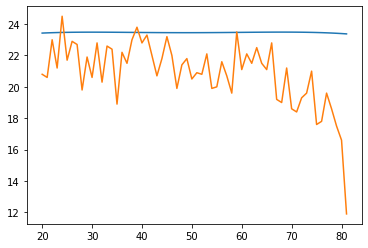

In [21]:
plt.plot(age_to_plot, over_time_plot[:,6])
plt.plot(age_to_plot, over_time_better_plot[:,6])

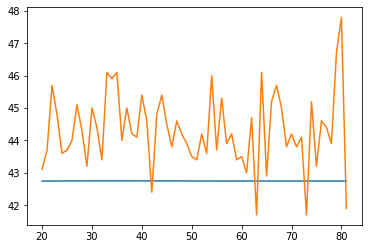

In [22]:
plt.plot(age_to_plot, over_time_plot[:,7])
plt.plot(age_to_plot, over_time_better_plot[:,7])

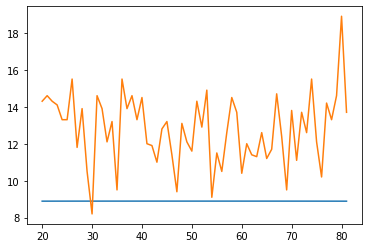

In [23]:
plt.plot(age_to_plot, over_time_plot[:,8])
plt.plot(age_to_plot, over_time_better_plot[:,8])

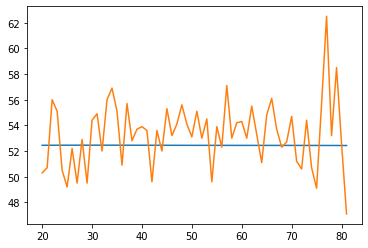

In [24]:
plt.plot(age_to_plot, over_time_plot[:,9])
plt.plot(age_to_plot, over_time_better_plot[:,9])

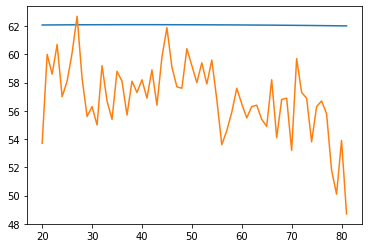

In [25]:
plt.plot(age_to_plot, over_time_plot[:,10])
plt.plot(age_to_plot, over_time_better_plot[:,10])

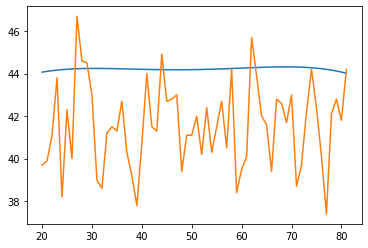

In [26]:
plt.plot(age_to_plot, over_time_plot[:,11])
plt.plot(age_to_plot, over_time_better_plot[:,11])

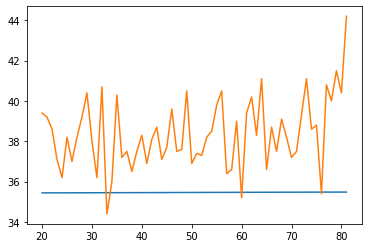

In [27]:
plt.plot(age_to_plot, over_time_plot[:,12])
plt.plot(age_to_plot, over_time_better_plot[:,12])

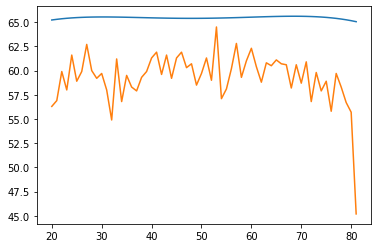

In [28]:
plt.plot(age_to_plot, over_time_plot[:,13])
plt.plot(age_to_plot, over_time_better_plot[:,13])

# 3D body analysis

In [29]:
from pygel3d import jupyter_display as jd
from pygel3d import hmesh

In [30]:
data = np.full(MEASURE_NUM, np.nan)
data[0] = 65
data[1] = 165
data[-1] = 19
pred = Predictor(data)
resh = Reshaper()
print(pred.current_measures)

[[-0.22337066  0.32782217  0.27452961 -0.41381124 -0.05397684 -0.39736985
  -0.04250539  0.19450609  0.22953157  0.16861838 -0.20127588 -0.04008183
  -0.25178224  0.06984576]]


In [31]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test1.obj",v,f,n)

obj file test1.obj saved


In [32]:
data = np.load("./processed_data/measures_with_age.npy")
data = pd.DataFrame(data)

In [33]:
pred = Predictor(age=40, weight=70.450161, height=172.375510)
measures= pred.normalized_measure[:,1026]
measures /= 10
measures[0] = ((measures[0]/100)**3)
print(measures)


TypeError: __init__() got an unexpected keyword argument 'age'

In [ ]:
v, n, f = resh.build_body(measures)
save_obj("test2.obj",v,f,n)

In [ ]:
data = np.load("./processed_data/life_selected.npy")
data = pd.DataFrame(data)

In [ ]:
measures = data.iloc[1904].copy().to_numpy()[:-1]
measures -= pred.mean_measure.flatten()
measures /= pred.std_measure.flatten()

measures /= 10
measures[0] = ((measures[0]/100)**3)
print(measures)

In [ ]:
v, n, f = resh.build_body(measures)
save_obj("test3.obj",v,f,n)

In [ ]:
pred = Predictor(age=40, weight=70, height=145)
resh = Reshaper()
print(pred.current_measures)

In [ ]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test4.obj",v,f,n)

In [ ]:
pred = Predictor(age=40, weight=70, height=210)
resh = Reshaper()
print(pred.current_measures)

In [ ]:
v, n, f = resh.build_body(pred.current_measures)
save_obj("test5.obj",v,f,n)